In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

In [2]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.dpi"] = 200

In [3]:
purple = "#967BB6"
hcn = pd.read_parquet('hcn.pq')
hcn_hcn = pd.read_parquet('hcn_hcn.pq')
hcn_hcn_hcn = pd.read_parquet('hcn_hcn_hcn.pq')

In [4]:
hcn.head()

,index,counts,local_frame,frame,time,n_atoms
64,CHN,1,4073,4073,0.050912,3
86,CHN,1,636,8636,0.107950,3
96,CHN,1,898,8898,0.111225,3
135,CHN,1,2189,10189,0.127362,3
149,CHN,1,2232,10232,0.127900,3


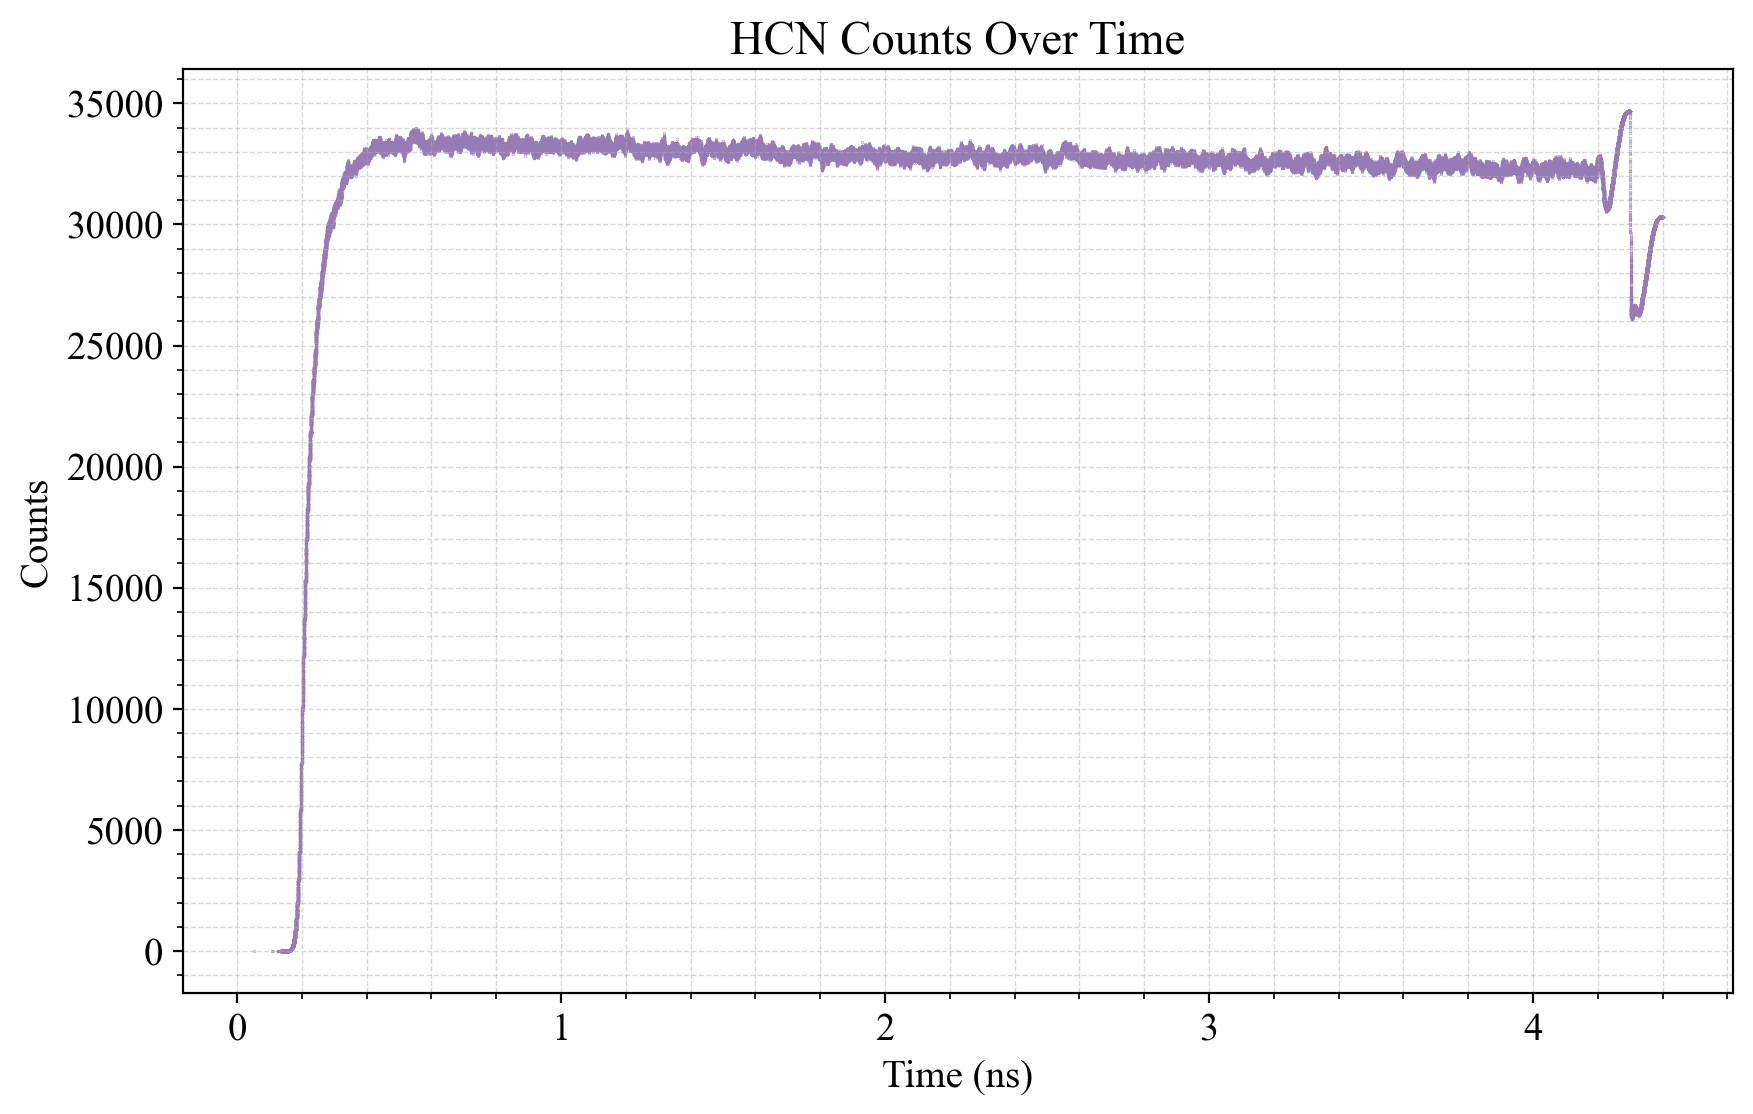

In [5]:
plt.scatter(hcn["time"], hcn["counts"], marker='.', s=0.1, alpha=1, label="HCN Counts", color=purple)  # Use scatter for large datasets
plt.xlabel("Time (ns)")
plt.ylabel("Counts")
plt.title("HCN Counts Over Time")
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
plt.minorticks_on()
plt.show()


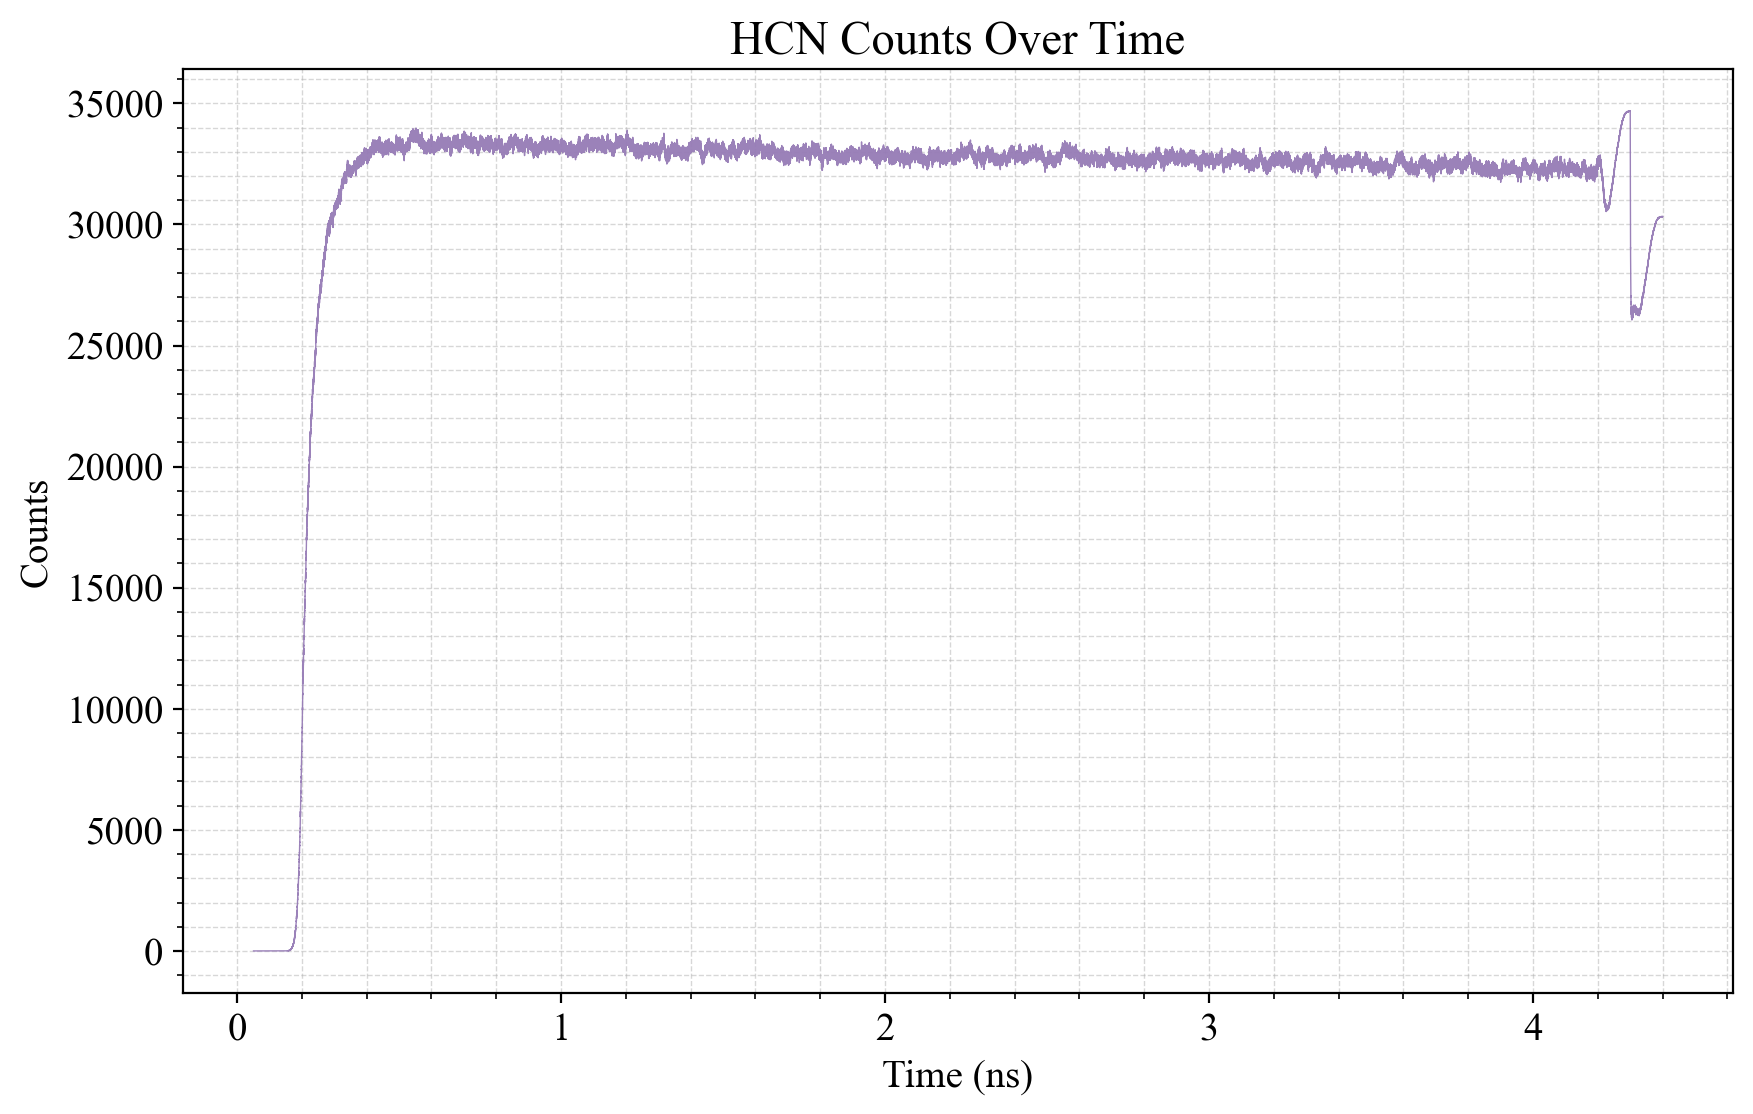

In [6]:
sns.lineplot(x=hcn["time"], y=hcn["counts"], linewidth=0.5, alpha=0.95, color=purple)

plt.xlabel("Time (ns)")
plt.ylabel("Counts")
plt.title("HCN Counts Over Time")

# Enable minor ticks for better axis detail
plt.minorticks_on()

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()


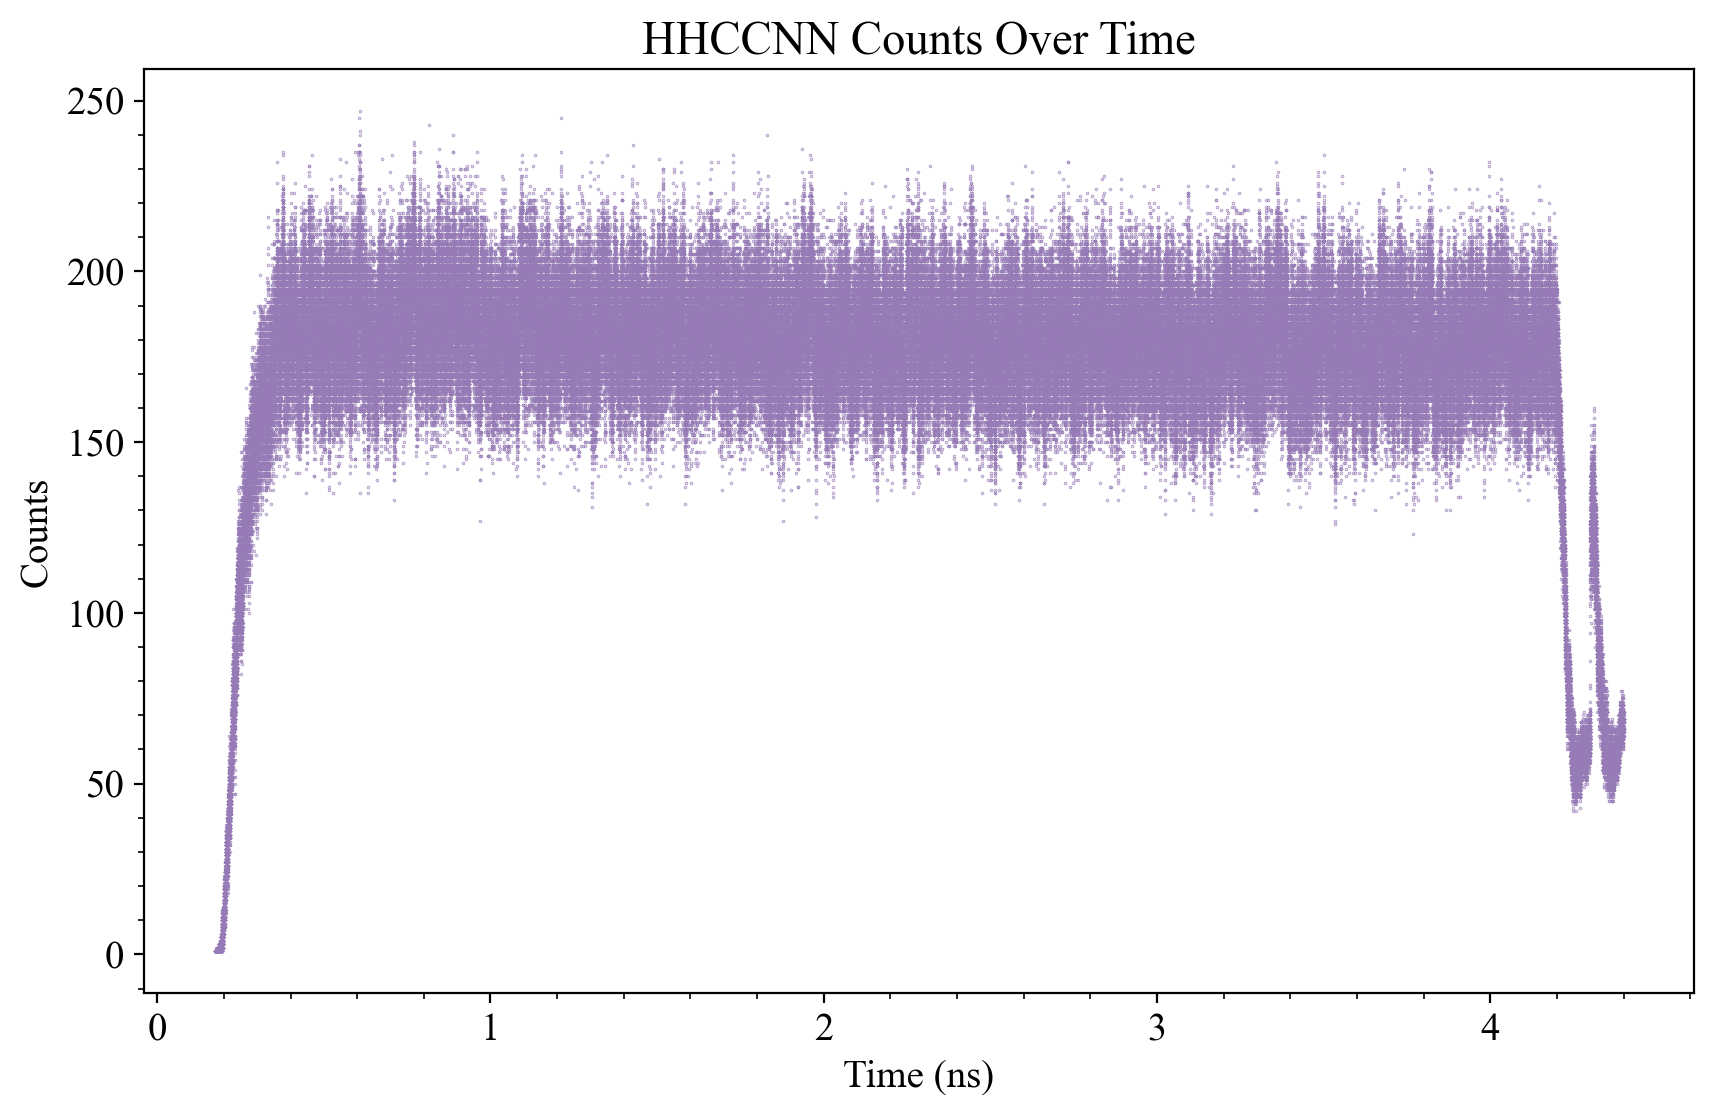

In [7]:
plt.scatter(hcn_hcn["time"], hcn_hcn["counts"], marker='.', s=0.25, alpha=0.9, label="HHCCNN Counts", color=purple)
plt.xlabel("Time (ns)")
plt.ylabel("Counts")
plt.title("HHCCNN Counts Over Time")
plt.minorticks_on()
plt.show()


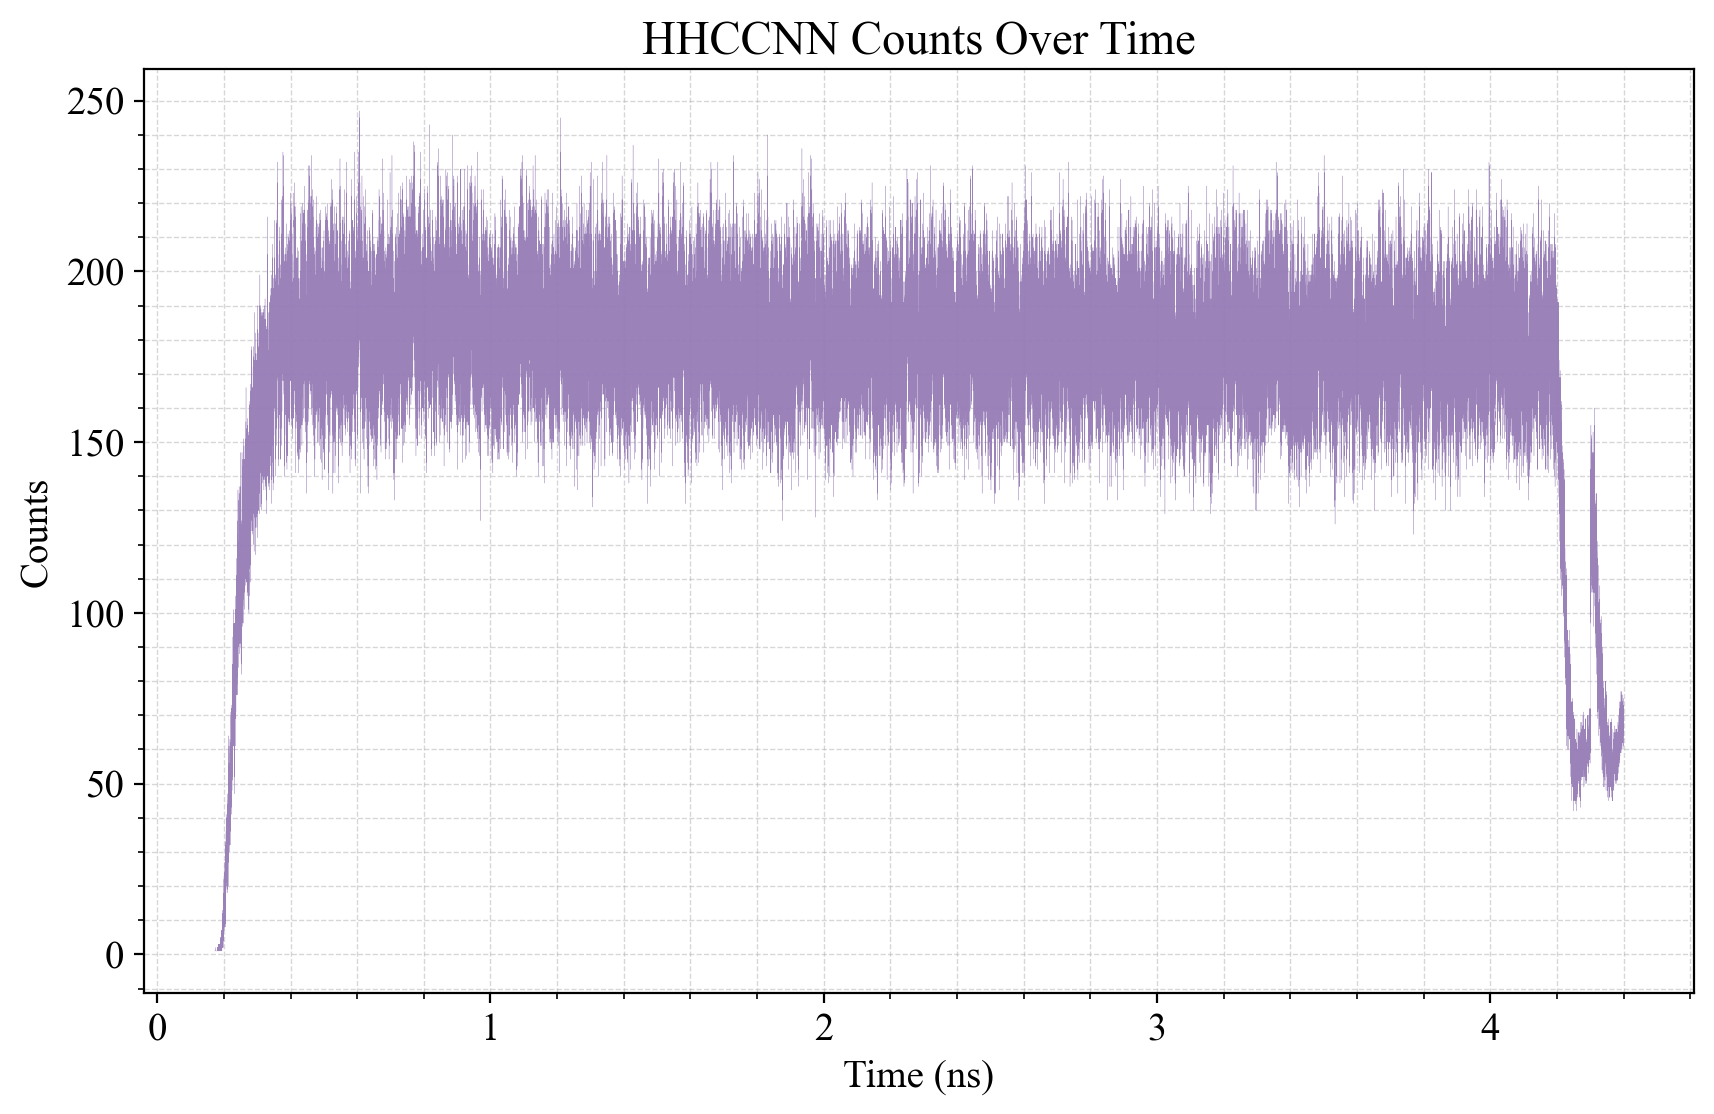

In [8]:
sns.lineplot(x=hcn_hcn["time"], y=hcn_hcn["counts"], linewidth=0.1, alpha=0.95, color=purple)

plt.xlabel("Time (ns)")
plt.ylabel("Counts")
plt.title("HHCCNN Counts Over Time")

# Enable minor ticks for better axis detail
plt.minorticks_on()

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()


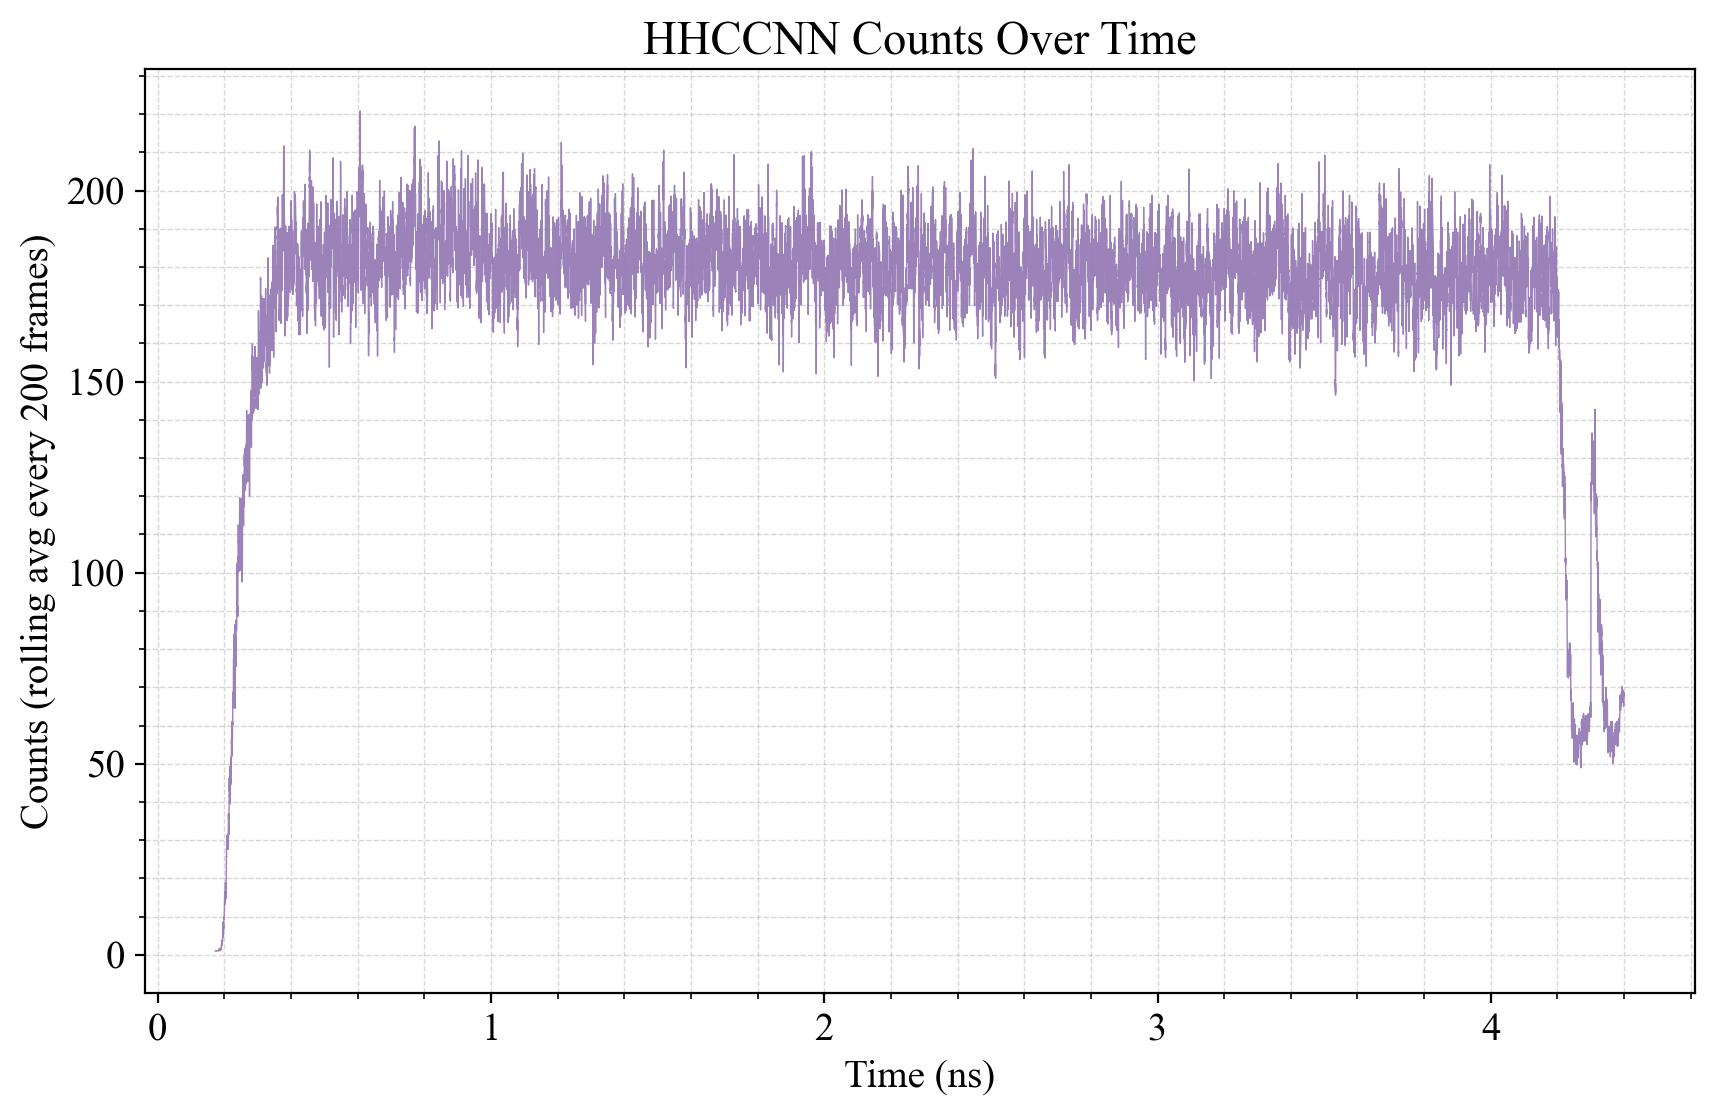

In [32]:
hcn_hcn["counts_smooth"] = hcn_hcn["counts"].rolling(window=50, min_periods=1).mean()

sns.lineplot(data=hcn_hcn, x="time", y="counts_smooth", linewidth=0.5, alpha=0.95, color=purple)

plt.xlabel("Time (ns)")
plt.ylabel("Counts (rolling avg every 200 frames)")
plt.title("HHCCNN Counts Over Time")

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
plt.minorticks_on()
plt.show()


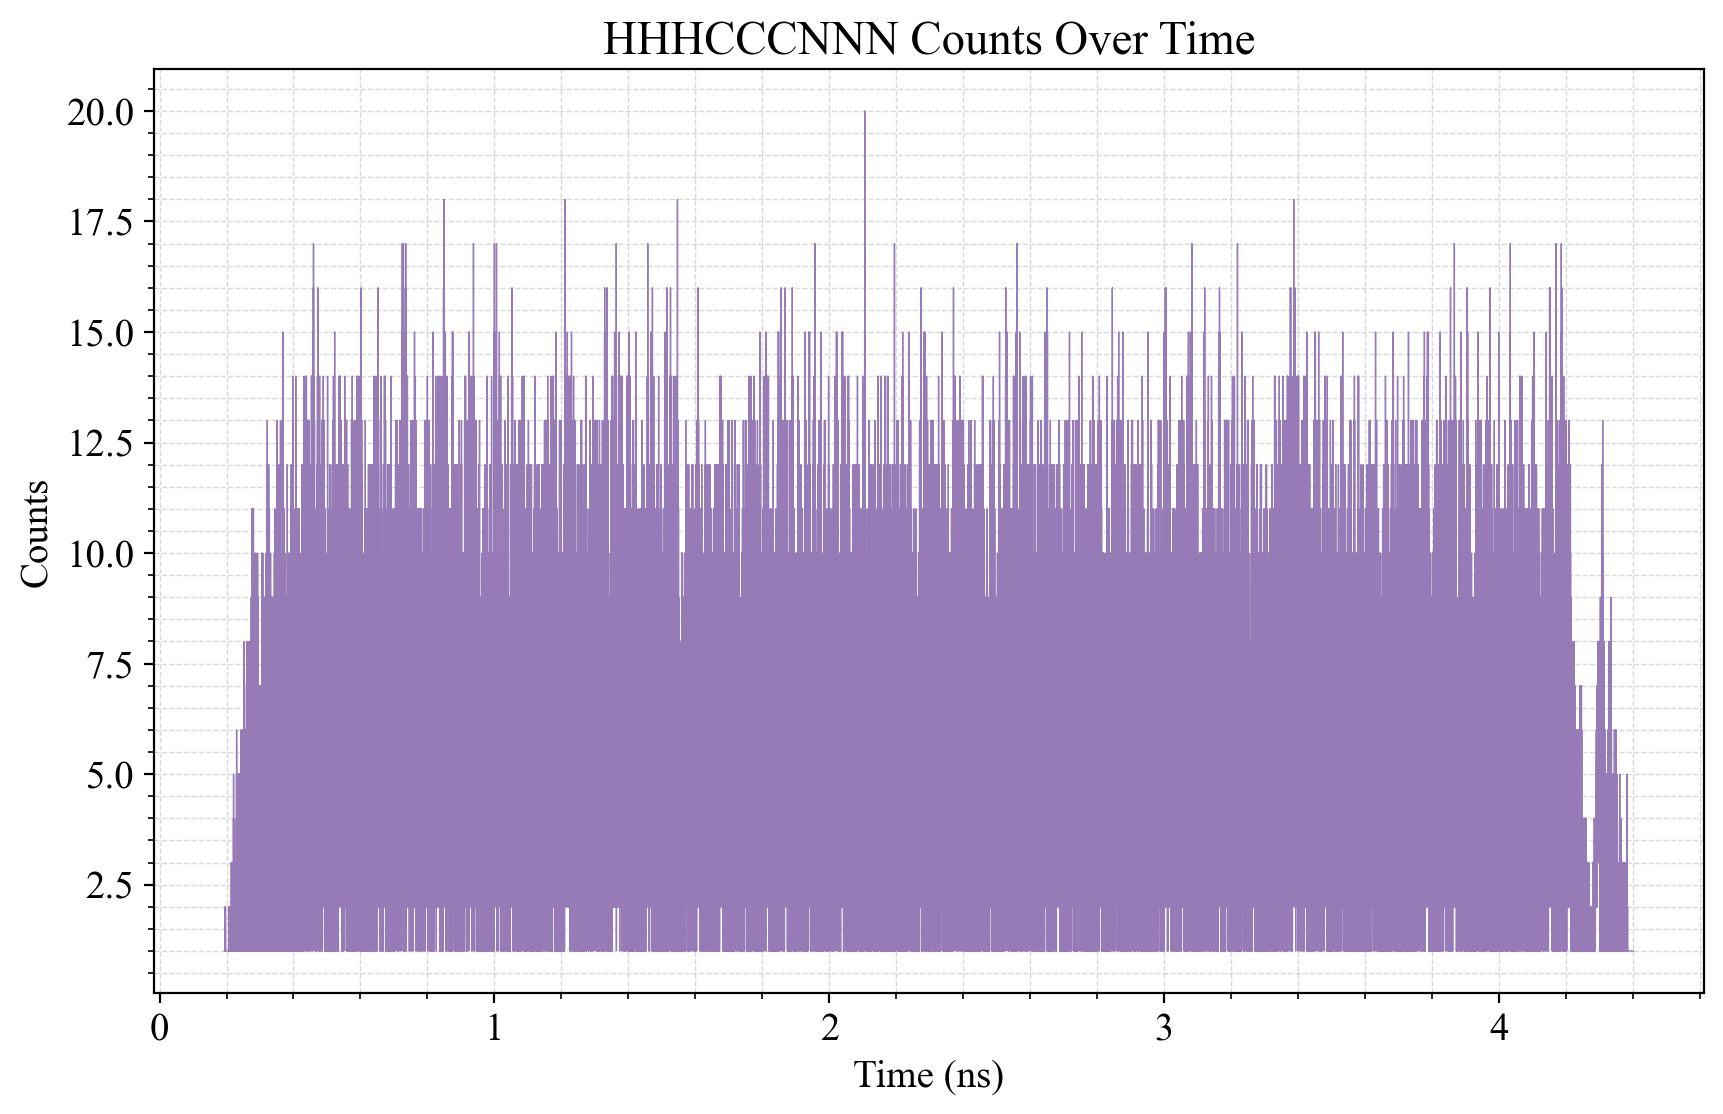

In [28]:
sns.lineplot(x=hcn_hcn_hcn["time"], y=hcn_hcn_hcn["counts"], linewidth=0.5, color="#967BB6")

plt.xlabel("Time (ns)")
plt.ylabel("Counts")
plt.title("HHHCCCNNN Counts Over Time")

# Enable minor ticks for better axis detail
plt.minorticks_on()

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()


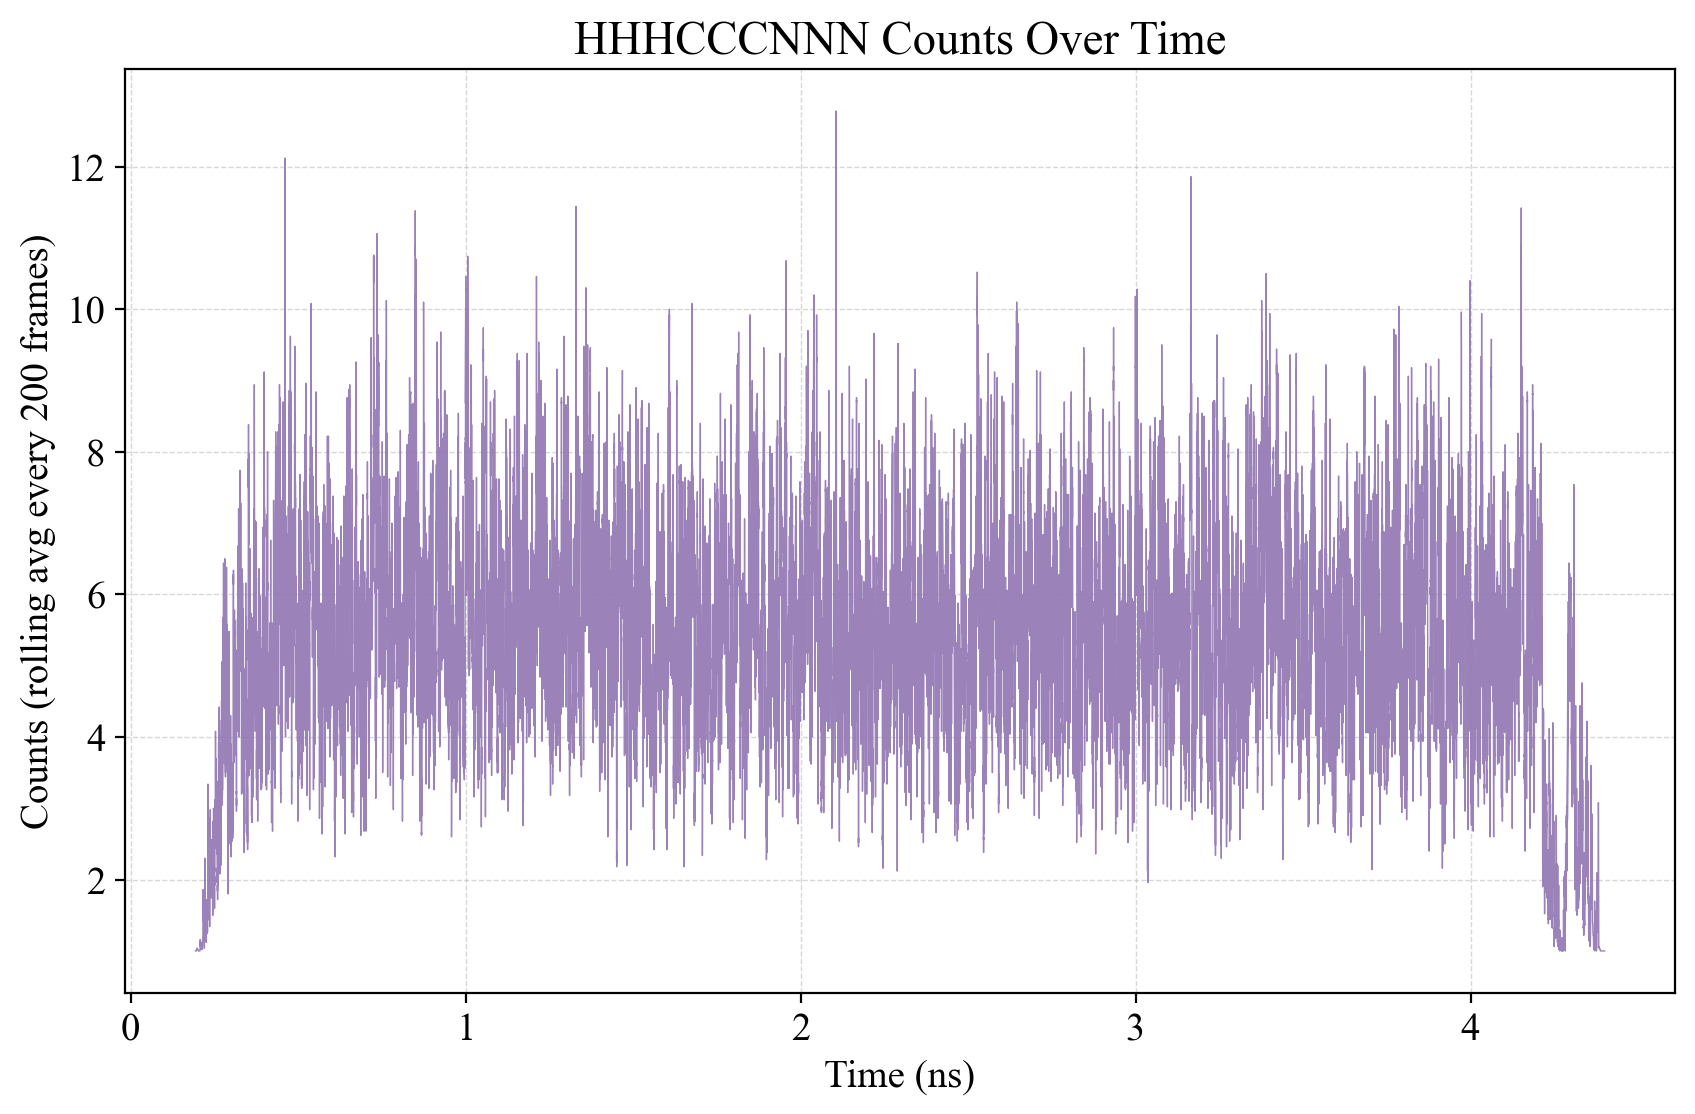

In [30]:
hcn_hcn_hcn["counts_smooth"] = hcn_hcn_hcn["counts"].rolling(window=50, min_periods=1).mean()

sns.lineplot(data=hcn_hcn_hcn, x="time", y="counts_smooth", linewidth=0.5, alpha=0.95, color="#967BB6")

plt.xlabel("Time (ns)")
plt.ylabel("Counts (rolling avg every 200 frames)")
plt.title("HHHCCCNNN Counts Over Time")

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()
